In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

In [3]:
acc = gpd.read_file('../data/Collisions.geojson')

In [4]:
acc['geometry'].head()

0    POINT (-122.3194826900306 47.67599681324806)
1     POINT (-122.3355699288946 47.5217841204985)
2    POINT (-122.3473968315823 47.65096640309453)
3    POINT (-122.3249560537502 47.63225641102942)
4    POINT (-122.3020586455341 47.64171802992309)
Name: geometry, dtype: object

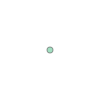

In [7]:
acc['geometry'][0]

In [8]:
point1=acc['geometry'][0]

In [13]:
point1.bounds[0]

-122.31948269003055

In [21]:
points = [(p.bounds[0],p.bounds[1]) for p in acc['geometry']]

AttributeError: 'NoneType' object has no attribute 'bounds'

In [28]:
acc['geometry'].isnull().sum()

7256

In [30]:
acc[acc['geometry'].isnull()].head(2)

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,geometry
41,42,300743,301963,3745603,Matched,Alley,NaN,None,,None,...,Daylight,None,None,None,32,One parked--one moving,0,0,N,None
73,74,300775,301995,E826134,Unmatched,Block,NaN,ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND...,,None,...,None,None,None,None,,None,0,0,N,None


In [32]:
acc[acc['geometry'].notnull()].head(2)

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,geometry
0,1,300647,301861,E828639,Matched,Block,NaN,WEEDIN E PL NE BETWEEN WEEDIN PL NE AND 8TH AV...,,None,...,Daylight,None,None,None,10,Entering at angle,0,0,N,POINT (-122.3194826900306 47.67599681324806)
1,2,300655,301869,3626843,Matched,Block,NaN,OLSON PL SW BETWEEN 1ST AVE S AND 2ND AVE SW,,None,...,Daylight,None,None,None,14,From same direction - both going straight - on...,0,0,N,POINT (-122.3355699288946 47.5217841204985)


In [34]:
points = [(p.bounds[0],p.bounds[1]) for p in acc['geometry'][acc['geometry'].notnull()]]

In [42]:
longitude = [p.bounds[0] for p in acc['geometry'][acc['geometry'].notnull()]]

In [44]:
df_loc=acc[acc['geometry'].notnull()]

In [48]:
len(df_loc)

202130

In [94]:
df_loc.iloc[202130]

OBJECTID           NaN
INCKEY             NaN
COLDETKEY          NaN
REPORTNO           NaN
STATUS             NaN
ADDRTYPE           NaN
INTKEY             NaN
LOCATION           NaN
EXCEPTRSNCODE      NaN
EXCEPTRSNDESC      NaN
SEVERITYCODE       NaN
SEVERITYDESC       NaN
COLLISIONTYPE      NaN
PERSONCOUNT        NaN
PEDCOUNT           NaN
PEDCYLCOUNT        NaN
VEHCOUNT           NaN
INJURIES           NaN
SERIOUSINJURIES    NaN
FATALITIES         NaN
INCDATE            NaN
INCDTTM            NaN
JUNCTIONTYPE       NaN
SDOT_COLCODE       NaN
SDOT_COLDESC       NaN
INATTENTIONIND     NaN
UNDERINFL          NaN
WEATHER            NaN
ROADCOND           NaN
LIGHTCOND          NaN
PEDROWNOTGRNT      NaN
SDOTCOLNUM         NaN
SPEEDING           NaN
ST_COLCODE         NaN
ST_COLDESC         NaN
SEGLANEKEY         NaN
CROSSWALKKEY       NaN
HITPARKEDCAR       NaN
geometry           NaN
longitude          NaN
latitude           NaN
Name: latitude, dtype: object

In [99]:
df_loc_c = df_loc.drop([202130], axis=0)

In [100]:
len(acc)

209386

In [101]:
[p.bounds(0) for p in df_loc['geometry']]

TypeError: 'tuple' object is not callable

In [102]:
# df_loc['geometry'].bounds['minx']

In [103]:
df_loc_c['longitude'] = df_loc_c['geometry'].bounds['minx']

AttributeError: 'float' object has no attribute 'bounds'

In [104]:
df_loc_c.columns

Index(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE',
       'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'geometry', 'longitude',
       'latitude'],
      dtype='object')

In [105]:
df_loc_c.loc['latitude'] = df_loc_c['geometry'].bounds['miny']

AttributeError: 'float' object has no attribute 'bounds'

In [106]:
type(df_loc_c['latitude'][0])

numpy.float64

In [116]:
df_tp[['longitude','latitude']].isnull().sum()

longitude    1
latitude     1
dtype: int64

In [120]:
df_tp[df_tp['latitude'].isnull()]

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_tp = pd.DataFrame(df_loc_c.drop(['geometry'],axis=1))


In [119]:
df_tp.head()

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude
0,1.0,300647.0,301861.0,E828639,Matched,Block,NaN,WEEDIN E PL NE BETWEEN WEEDIN PL NE AND 8TH AV...,,None,...,None,None,None,10,Entering at angle,0.0,0.0,N,-122.319483,47.675997
1,2.0,300655.0,301869.0,3626843,Matched,Block,NaN,OLSON PL SW BETWEEN 1ST AVE S AND 2ND AVE SW,,None,...,None,None,None,14,From same direction - both going straight - on...,0.0,0.0,N,-122.335570,47.521784
2,3.0,300644.0,301858.0,E828638,Matched,Intersection,27031.0,TROLL AVE N AND N 36TH ST,,None,...,None,None,None,32,One parked--one moving,0.0,0.0,Y,-122.347397,47.650966
3,4.0,300662.0,301876.0,3705919,Matched,Intersection,29080.0,FRANKLIN AVE E AND E GALER ST,,None,...,None,None,None,32,One parked--one moving,0.0,0.0,Y,-122.324956,47.632256
4,5.0,300650.0,301864.0,3206769,Matched,Intersection,28403.0,24TH AVE E AND E MILLER ST,,None,...,None,None,None,14,From same direction - both going straight - on...,0.0,0.0,N,-122.302059,47.641718


In [109]:
type(df_tp['latitude'][0])

numpy.float64

In [110]:
df_tp.to_json('../data/cleaned/coll_coord.json')

In [111]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202130 entries, 0 to latitude
Data columns (total 40 columns):
OBJECTID           202129 non-null float64
INCKEY             202129 non-null float64
COLDETKEY          202129 non-null float64
REPORTNO           202129 non-null object
STATUS             202129 non-null object
ADDRTYPE           202129 non-null object
INTKEY             67262 non-null float64
LOCATION           202129 non-null object
EXCEPTRSNCODE      84140 non-null object
EXCEPTRSNDESC      7190 non-null object
SEVERITYCODE       202128 non-null object
SEVERITYDESC       202129 non-null object
COLLISIONTYPE      179242 non-null object
PERSONCOUNT        202129 non-null float64
PEDCOUNT           202129 non-null float64
PEDCYLCOUNT        202129 non-null float64
VEHCOUNT           202129 non-null float64
INJURIES           202129 non-null float64
SERIOUSINJURIES    202129 non-null float64
FATALITIES         202129 non-null float64
INCDATE            202129 non-null object
INC

In [113]:
len(df_tp['longitude'])

202130

In [115]:
df_tp['longitude'][202129]

-122.32136569830023